Import Library



Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 2.0518 - accuracy: 0.1786
Epoch 1: val_loss improved from inf to 1.77803, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 23s 6s/step - loss: 2.0518 - accuracy: 0.1786 - val_loss: 1.7780 - val_accuracy: 0.2500
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 1.8058 - accuracy: 0.1786
Epoch 2: val_loss improved from 1.77803 to 1.75021, saving model to model.h5
4/4 [==============================] - 11s 3s/step - loss: 1.8058 - accuracy: 0.1786 - val_loss: 1.7502 - val_accuracy: 0.3125
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 1.7059 - accuracy: 0.3393
Epoch 3: val_loss improved from 1.75021 to 1.74583, saving model to model.h5
4/4 [==============================] - 12s 3s/step - loss: 1.7059 - accuracy: 0.3393 - val_loss: 1.7458 - val_accuracy: 0.1875
Epoch 4/50
4/4 [==============================] - ETA: 0s - loss: 1.6526 - accuracy: 0.3036
Epoch 4: val_loss improved from 1.74583 to 1.64222, saving model to model.h5
4/4 [==============================] - 14s 4s/step - loss: 1.6526 - accuracy: 0.3036 - val_loss: 1.6422 - val_ac

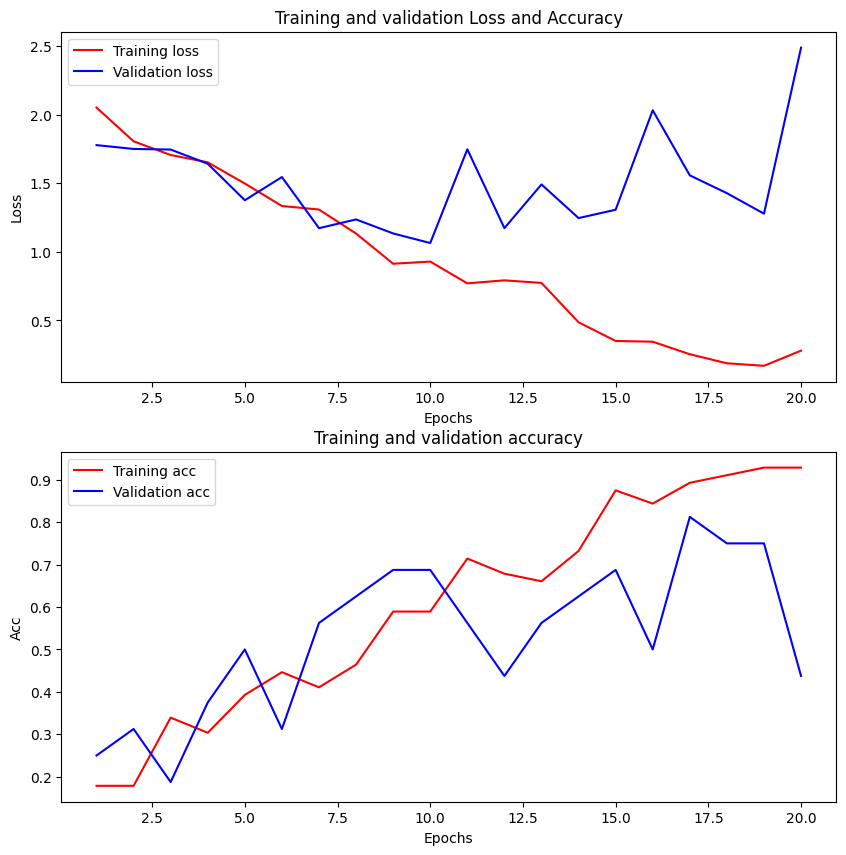

<ipython-input-1-bf1c69897042>:155: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_generator)


Val loss: 1.0706100463867188
Val accuracy: 0.6666666865348816


<ipython-input-1-bf1c69897042>:160: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.7895093560218811
Test accuracy: 0.6333333253860474


<ipython-input-1-bf1c69897042>:197: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Classification Report
              precision    recall  f1-score   support

        acai       1.00      0.80      0.89         5
     cupuacu       0.33      0.40      0.36         5
    graviola       0.62      1.00      0.77         5
     guarana       1.00      0.60      0.75         5
     pupunha       0.56      1.00      0.71         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.63        30
   macro avg       0.59      0.63      0.58        30
weighted avg       0.59      0.63      0.58        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


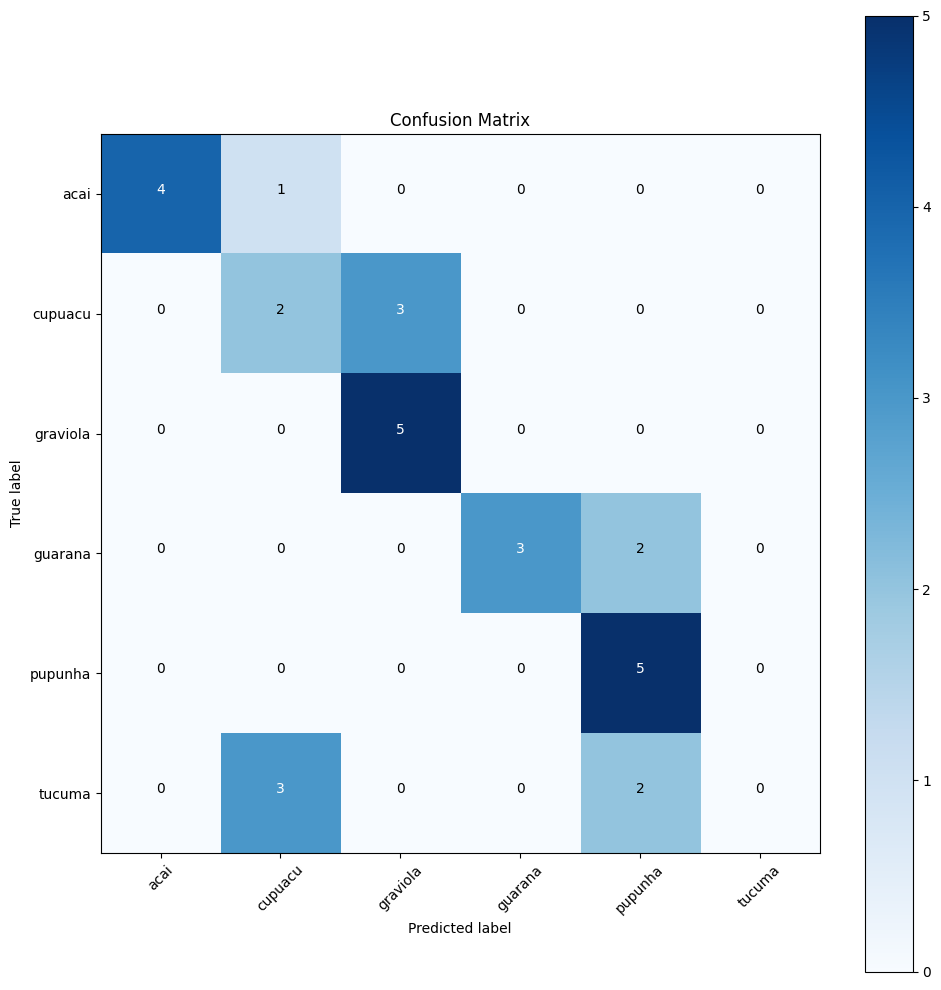

In [1]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Dataset
im_shape = (250,250)

TRAINING_DIR = '/content/drive/MyDrive/ds_frutas_am/train'
TEST_DIR = '/content/drive/MyDrive/ds_frutas_am/test'

seed = 10
BATCH_SIZE = 16

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1./255)

# data_generator = ImageDataGenerator(
#         validation_split=0.2,
#         rotation_range=20,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

#Build CNN Model
model = Sequential()

# Lớp tích chập đầu tiên, xác định input (im_shape[0], im_shape[1], 3)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(im_shape[0], im_shape[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp tích chập thứ hai
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp tích chập thứ ba
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# Lớp tích chập thứ tư
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

# # Có thể xây thêm các Lớp tích chập khác ...
# model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# model.add(AveragePooling2D(pool_size=(2, 2)))

# Lớp Flatten để chuyển từ tensor 3D sang vector 1D
model.add(Flatten())

# Lớp fully connected đầu tiên
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))  # Để tránh overfitting

# Lớp fully connected thứ hai
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Lớp output, số lượng lớp tùy thuộc vào số lượng classes cần phân loại
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

#Training

epochs = 50

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]
'''
EarlyStopping Callback:
monitor='val_loss': tham số mà callback sẽ theo dõi, giống như ModelCheckpoint.
patience=10: nếu không có cải thiện trong val_loss trong 10 epoch liên tiếp, huấn luyện sẽ dừng.
verbose=1: Thông báo chi tiết về quá trình dừng huấn luyện.
'''

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE, #75//16
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE
)

# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'r', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'r', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

#Đánh giá mô hình
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('model.h5')

# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))